## Requirements

In [1]:
import matplotlib.pyplot as plt
from vpython import canvas, rate, sphere, sqrt, vector

<IPython.core.display.Javascript object>

## Problem setting

Consider two particles $p_1$ and $p_2$ with given masses $m_1$ and $m_2$, radii $R_1$ and $R_2$, initial positions $\vec{r}_1$ and $\vec{r}_2$ (in 3D) and velocities $\vec{v}_1$ and $\vec{v}_2$ respectively.  We consider elastic collision, so both momentum and energy are conserved quantities.

We use time discretization to simulate the system, starting at $t = 0$ and using time intervals $\Delta t$.  Since there are no forces acting on the particles unless they collide, the equations of motion are given by
$$
    \begin{array}{rcl}
        \vec{r}_1(t + \Delta t) & = & \vec{r}_1(t) + \vec{v}_1(t) \Delta t \\
        \vec{r}_2(t + \Delta t) & = & \vec{r}_2(t) + \vec{v}_2(t) \Delta t
    \end{array}
$$

So when the particles do not collide, $\vec{v}_1(t + \Delta t) = \vec{v}_1(t)$ and $\vec{v}_2(t + \Delta t) = \vec{v}_2(t)$.

The collision is modelled by a force that is parallel to
$\vec{r}_1 - \vec{r}_2$ and proportional to its length.  When
$\| \vec{r}_1 - \vec{r}_2 \| < R_1 + R_2$, the force exerted by the first particle exerted on the second is $\vec{F}_{12} = \vec{r}_1 - \vec{r}_2$
while the force of the second particle on the first is
$\vec{F}_{21} = -\vec{F}_{12}$.

$$
    \begin{array}{rcl}
         \vec{v}_1(t + \Delta t) & = & \vec{v}_1(t) + \frac{\vec{F}_{12}(t)}{m_1} \Delta t \\
         \vec{v}_2(t + \Delta t) & = & \vec{v}_2(t) + \frac{\vec{F}_{21}(t)}{m_2} \Delta t
    \end{array}
$$

The collision can be visualized using vpython.

## Implementation

For convenience, we first write a function to create a vpython `sphere` that represents a particle.  For convenience, the radius of the particle is always equal to 1.

In [2]:
def create_particle(m, pos, v):
    radius = 1.0
    particle = sphere(pos=pos, radius=radius)
    particle.m = m
    particle.v = v
    return particle

A second function computes the force that the first particle exerts on the second, which is $\vec{0}$ when they do not collide.

In [3]:
def interaction_force(p1, p2):
    distance = sqrt((p1.pos.x - p2.pos.x)**2 + (p1.pos.y - p2.pos.y)**2 + (p1.pos.z - p2.pos.z)**2)
    if distance >= p1.radius + p2.radius:
        return vector(0.0, 0.0, 0.0)
    else:
        force_vector = (p1.pos - p2.pos)
        return force_vector

A third functions computes the total kinetic energy of the two particles.

In [4]:
def total_kinetic_energy(p1, p2):
    v1_sqr = p1.v.x**2 + p1.v.y**2 + p1.v.z**2
    v2_sqr = p2.v.x**2 + p2.v.y**2 + p2.v.z**2
    return 0.5*(p1.m*v1_sqr + p2.m*v2_sqr)

Finally, we implement the actual simulation.

In [14]:
def animate_particles(m1, pos1, v1, m2, pos2, v2, t_max=10.0):
    canvas()
    p1 = create_particle(m1, pos1, v1)
    p2 = create_particle(m2, pos2, v2)
    time = []
    kinetic_energy = []
    momentum = []
    t = 0
    delta_t = 0.0001
    while t <= t_max:
        time.append(t)
        kinetic_energy.append(total_kinetic_energy(p1, p2))
        momentum.append(p1.m*p1.v + p2.m*p2.v)
        rate(1.0/delta_t)
        p1.pos += p1.v*delta_t
        p2.pos += p2.v*delta_t
        F12 = interaction_force(p1, p2)
        F21 = -F12
        p1.v += F12*delta_t/p1.m
        p2.v += F21*delta_t/p2.m
        t += delta_t
    return time, kinetic_energy, momentum

In [15]:
m1 = 1.0
pos1 = vector(-5.0, 0.5, 0.0)
v1 = vector(1.0, 0.0, 0.0)
m2 = 1.0
pos2 = vector(0.0, 0.0, 0.0)
v2 = vector(0.0, 0.0, 0.0)
time, kinetic_energy, momentum = animate_particles(m1, pos1, v1, m2, pos2, v2)

<IPython.core.display.Javascript object>

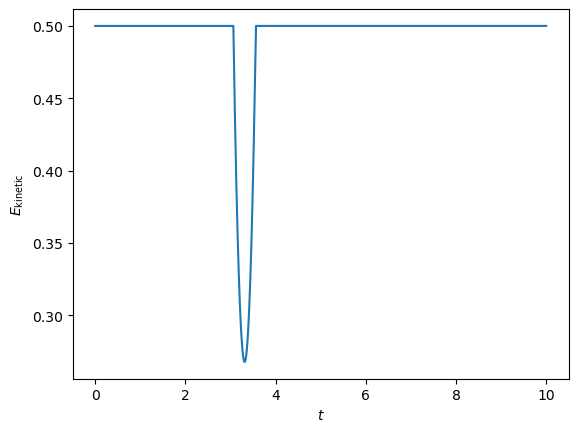

In [18]:
plt.plot(time, kinetic_energy)
plt.xlabel('$t$')
plt.ylabel('$E_{\mathrm{kinetic}}$');

In [13]:
print(f'initial momentum: {momentum[0]},\nfinal momentum:   {momentum[-1]}')

initial momentum: <1, 0, 0>,
final momentum:   <1, 0, 0>


Both the total kinetic energy and momentum are conserved quantities.  However, note that $\Delta t$ should be sufficiently small.